### Algotimos genéticos

Para los ejemplos utilizaremos el problema del viajante de comercio (TSP)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import time

## **Chromosome and fitness function**

In [3]:
cities = [
	[0.8744058793117488, 0.30207179832703746],
    [0.6901572276474558, 0.8203362566663311],
    [0.7793458478083026, 0.09728979746351918], 
    [0.7483358474304422, 0.4563419482458657], 
    [0.4556164527790729, 0.12863149772605698], 
    [0.1837236688553453, 0.23773749495644914], 
    [0.806151832654163, 0.3288366900529254], 
    [0.6222702185205219, 0.6019431085670109], 
    [0.21886861543988367, 0.6980104036528004], 
    [0.9706096813038716, 0.054871876245520146], 
    [0.13881496219356027, 0.048489530185603646],
    [0.08511086492841424, 0.9123075505436051], 
    [0.45436952164297595, 0.4731540740573398], 
    [0.8986352255038935, 0.5116579750591849], 
    [0.9539248970461742, 0.7530784036308166],
    [0.6321102985156373, 0.13575967095580344],
    [0.31130918313591205, 0.8545457319320597], 
    [0.025897479791937017, 0.7854526665590987],
    [0.31414095045738066, 0.051421702103483846],
    [0.2739561013272712, 0.1970964027924862],
    [0.22762328443470214, 0.627414210742153],
    [0.44920042912037383, 0.18835427573438068],
    [0.2793138301174244, 0.9103956650199608],
    [0.005128451667189338, 0.4655718085045638], 
    [0.9222718335261915, 0.8613103704784812],
    [0.49352498279326595, 0.28652416807644077],
    [0.5560886356057152, 0.034564925228364185],
    [0.0048939219846825255, 0.8635350555457212], 
    [0.7824462381771976, 0.09355415747424733], 
    [0.2973635133076785, 0.037580527218207815],
    [0.659068210692151, 0.5602321147981546], 
    [0.43549418718677035, 0.6241289474799954],
    [0.25580657871099755, 0.519726015381631], 
    [0.5950780852425872, 0.3193476592023645],
    [0.15763623266223903, 0.18210618406479095], 
    [0.3434173147566393, 0.32992255868483356], 
    [0.06451313705472006, 0.12606114349173192], 
    [0.23212286400737547, 0.3945559700824013], 
    [0.955507285594692, 0.02296933408938162],
    [0.7459955912073274, 0.1385374827130177],
    [0.46365765315595475, 0.6132297411379687],
    [0.20196772698059162, 0.046358747430397584], 
    [0.2980093518214506, 0.36041197123227897],
    [0.7533459401199348, 0.6610562232191091], 
    [0.323433933838161, 0.5068337090138902], 
    [0.062138830138457, 0.7177455044259695], 
    [0.47467832142010535, 0.17692718986260936],
    [0.2415634321550142, 0.500852093941769],
    [0.3441878827094532, 0.2604351258948506], 
    [0.5445252142594251, 0.7295590645635646],
    [0.25391391610860914, 0.7641244059389684],
    [0.2630560480211699, 0.010670642241309536],
    [0.2092202940037915, 0.7415775443241935],
    [0.0031474687633804566, 0.6974574785842637],
    [0.4952329615559806, 0.9311775894780175], 
    [0.1978488658972426, 0.8872693649066419],
    [0.1705364411799497, 0.8846808176103278], 
    [0.7634962513234275, 0.4358457309207533], 
    [0.9259752834140167, 0.0056226911773098465],
    [0.22090405091557253, 0.14500040130773872], 
    [0.4636205151855679, 0.19249574424477278], 
    [0.8057632881682811, 0.250168118157608], 
    [0.6785236695642043, 0.39119477830554505],
    [0.4837264739606879, 0.23045417711558214],
    [0.8786721718893166, 0.015853186240832207],
    [0.1263309724872509, 0.9185321014517236], 
    [0.24969404380600335, 0.9600467657522086],
    [0.5886119367943214, 0.10948123668473264], 
    [0.13373527735293878, 0.5336853876899833], 
    [0.5642696742735989, 0.9801384844337597], 
    [0.646401605512568, 0.3338636388089157], 
    [0.05603526365085032, 0.3149530712641142], 
    [0.387141492676661, 0.5792852545912592], 
    [0.8634070619751958, 0.8206820685065667],
    [0.4662474858565825, 0.32647667516764145], 
    [0.01801973379815025, 0.12175434785651695],
    [0.6218125565554127, 0.07860046445444713], 
    [0.6573938922925594, 0.5023092428939168], 
    [0.2837581848186974, 0.02576704782244421], 
    [0.3044774374252185, 0.7310313422019327], 
    [0.33131673439274434, 0.693896434962478], 
    [0.8523694048117944, 0.2805224723356823], 
    [0.6200019812032047, 0.03989814578273998],
    [0.5437394088109648, 0.3258031129949792],
    [0.4386079860370994, 0.6142798815693052],
    [0.7430581106897977, 0.49260737229959284], 
    [0.3913628378102181, 0.3185830750836698], 
    [0.9065498976196814, 0.02381958527497441], 
    [0.6874236611131453, 0.18642068590773597], 
    [0.6946411585627993, 0.36991609629423117], 
    [0.3784063098306413, 0.01018756575849844], 
    [0.43806374889930155, 0.2268325586117821], 
    [0.7411632641820634, 0.35513151640087337], 
    [0.3884706603234591, 0.34043302784114093], 
    [0.08674110453583683, 0.4491174987265194], 
    [0.9794883193315694, 0.11207520940235804], 
    [0.7496156619797683, 0.23845386610980834], 
    [0.4423888847621813, 0.17212722421686055], 
    [0.2276570035864689, 0.6515924491551327],
    [0.836939257954547, 0.0499933914625984]
] # Length=8.587

def dist(x, y): # distancia euclídea
	return ((x[0]-y[0])**2 + (x[1]-y[1])**2) ** 0.5

def globaldist(cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def fit_cities(cities): # fitness para TSP
	return 1 / (1+globaldist(cities))

## **Visual test**

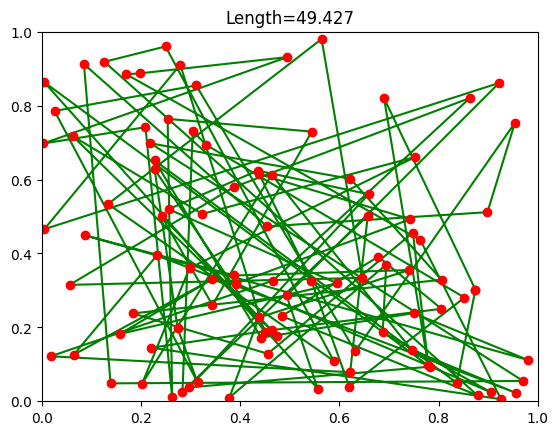

In [4]:
# draw a TSP solution
def draw(solution):
    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    xlim = axes.set_xlim(0.0,1.0)
    ylim = axes.set_ylim(0.0,1.0)
    x = []
    y = []

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera

    c = np.array(bucle)
    x = c[:,0]
    y = c[:,1]

    l1, = axes.plot(x, y,'g')
    l2, = axes.plot(x, y,'ro')
    
    s = 'Length=%5.3f' % globaldist(bucle)
    plt.title(s)

draw(cities)

## **Method´s implementation**

In [11]:
class AG_TSP_2D():

    def __init__(self, alphabet: list[list], population_size: int):
        """Create and return new population"""

        self.population = []
        self.fitnesses = []
        for i in range(population_size):
            self.population.append(copy.copy(alphabet))
            random.shuffle(self.population[i])

    def sort_pop(self, fitness_function, reverse_sort: bool) -> None:
        """Sort population by fitness function. Return tuple with population list and fitness list"""

        fitness_list = [fitness_function(ind) for ind in self.population]
        lista = sorted(zip(self.population, fitness_list), key=lambda x: x[1], reverse=reverse_sort)
        self.population = [x[0] for x in lista]
        self.fitnesses = [x[1] for x in lista]

    def select(self, T: int) -> list[list]:
        """Return a copy of an indivudual by tournament selection. Population already ordered by fitness"""

        choices=random.choices(copy.copy(self.population), k=T)
        indices=[self.population.index(c) for c in choices]
        return self.population[np.argmin(indices)]

    def crossover(self, parent1: list[list], parent2: list[list], pcross: float) -> tuple[list[list], list[list]]:
        """Performs crossover on two parents to generate two children. PMX method"""

        child1 = parent1[:]
        child2 = parent2[:]

        if random.random() < pcross:
            size = len(parent1)
            start, end = sorted(random.sample(range(size), 2))

            # Copiar segmento intermedio
            child1[start:end+1] = parent1[start:end+1]
            child2[start:end+1] = parent2[start:end+1]

            # Mapear elementos del segmento intermedio para el primer hijo
            for i in range(start, end+1):
                if parent2[i] not in child1:
                    pos = i
                    while start <= pos <= end:
                        pos = parent2.index(parent1[pos])
                    child1[pos] = parent2[i]

            # Mapear elementos del segmento intermedio para el segundo hijo
            for i in range(start, end+1):
                if parent1[i] not in child2:
                    pos = i
                    while start <= pos <= end:
                        pos = parent1.index(parent2[pos])
                    child2[pos] = parent1[i]

            # Rellenar valores restantes en el primer hijo
            for i in range(size):
                if child1[i] == -1:
                    child1[i] = parent2[i]

            # Rellenar valores restantes en el segundo hijo
            for i in range(size):
                if child2[i] == -1:
                    child2[i] = parent1[i]

        return child1, child2

    def mutate(self, individual: list[list], pmut: float) -> list[list]:
        """Mutate an individual, swap elements. Return mutated individual"""

        def mutate_swap(individual: list[list], pmut: float) -> list[list]:
            """la mutación consistirá en intercambiar elementos"""
            if random.random() < pmut:
                index1, index2 = random.choices(range(len(individual)), k=2)
                individual[index1], individual[index2] = individual[index2], individual[index1]
            return individual

        def mutate_insert(individual: list[list], pmut: float) -> list[list]:
            """la mutación consistirá en borrar un elemento e insertarlo en otro lado"""
            if random.random() < pmut:
                index_pop, index_insert = random.choices(range(len(individual)), k=2)
                value = individual.pop(index_pop)
                individual.insert(index_insert, value)
            return individual

        def mutate_reverse(individual: list[list], pmut: float) -> list[list]: 
            """selecciona dos puntos e invierte la secuencia entre ellos"""
            if random.random() < pmut:
                index1, index2 = sorted(random.sample(range(len(individual)), 2))
                individual[index1:index2 + 1] = individual[index1:index2 + 1][::-1]
            return individual
        
        mutations = [mutate_swap, mutate_insert, mutate_reverse]
        operator = random.choice(mutations)
        return operator(individual, pmut)

    def evolve(self, fitness_function, pmut=0.1, pcross=0.7, ngen=100, T=2, reverse_sort=False, elitism=False) -> None:
        """Evolution procedure"""

        size = len(self.population)
        for i in range(ngen):
            new_pop = []
            self.sort_pop(fitness_function, reverse_sort)
            if elitism:
                new_pop.append(self.population[0])
                new_pop.append(self.population[1])
            while len(new_pop) != size:   
                individual1 = self.select(T)
                individual2 = self.select(T)
                child1,child2 = self.crossover(individual1, individual2, pcross)
                mutated1 = self.mutate(child1, pmut)
                mutated2 = self.mutate(child2, pmut)
                new_pop.append(mutated1)
                new_pop.append(mutated2)
            
            if i == ngen-1:
                self.sort_pop(fitness_function, reverse_sort)
            
            self.population = [*new_pop]
        return self.population

## **Media de 10 ejecuciones**

In [9]:
def plot_mean_fitnesses(medidas: list):
    media = np.mean(medidas)  
    min_val = min(medidas)    

    plt.figure(figsize=(8, 6))
    bars = plt.bar(
        range(len(medidas)),
        medidas,
        color=['green' if val == min_val else 'skyblue' for val in medidas],
        label='Medidas'
    )  # Barras

    plt.axhline(media, color='red', linestyle='--', label=f'Media ({media:.2f})')  # media

    # valor dentro de cada barra
    for i, bar in enumerate(bars):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Coordenada X
            bar.get_height() / 2,              # Coordenada Y
            f'{medidas[i]:.3f}',                   # Texto a mostrar
            ha='center', va='center',          # Alineación
            fontsize=10, color='black'         # Estilo del texto
        )

    plt.xticks(range(len(medidas)), labels=[f'E{i+1}' for i in range(len(medidas))])  # Etiquetas eje X
    plt.title('Ejecuciones TSP 2D', fontsize=14)
    plt.xlabel('Ejecuciones', fontsize=12)
    plt.ylabel('Fitnesses', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Línea de grilla horizontal

    plt.tight_layout()
    plt.show()

Best fitness exec 1: 7.853457160818247
*******Tiempo transcurrido: 0 minutos y 48.50 segundos*******
Best fitness exec 2: 7.913253597160224
*******Tiempo transcurrido: 0 minutos y 48.70 segundos*******
Best fitness exec 3: 7.969055541712689
*******Tiempo transcurrido: 0 minutos y 48.96 segundos*******
Best fitness exec 4: 7.955244708425976
*******Tiempo transcurrido: 0 minutos y 48.67 segundos*******
Best fitness exec 5: 8.172201892931048
*******Tiempo transcurrido: 0 minutos y 48.10 segundos*******
Best fitness exec 6: 7.98772375343471
*******Tiempo transcurrido: 0 minutos y 47.77 segundos*******
Best fitness exec 7: 8.110104177643317
*******Tiempo transcurrido: 0 minutos y 47.60 segundos*******
Best fitness exec 8: 7.86215154874703
*******Tiempo transcurrido: 0 minutos y 47.77 segundos*******
Best fitness exec 9: 7.771415163129902
*******Tiempo transcurrido: 0 minutos y 47.91 segundos*******
Best fitness exec 10: 8.189904833374019
*******Tiempo transcurrido: 0 minutos y 48.04 segundo

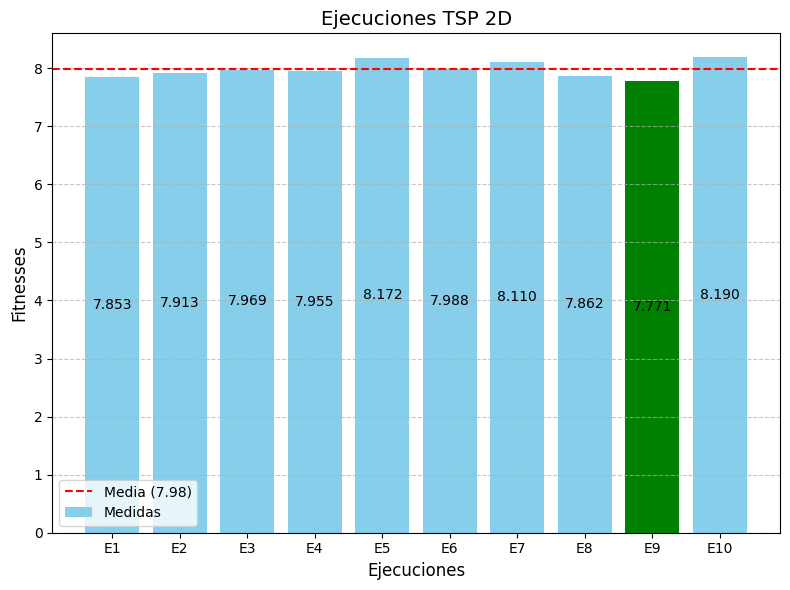

In [ ]:
medidas_TSP = []

for i in range(1, 11):
    start = time.time()
    genetic_algorithm = AG_TSP_2D(alphabet=cities, population_size=100) 
    final_population = genetic_algorithm.evolve(fitness_function=globaldist, pmut=0.1, ngen=10000, T=6, trace=500)
    minutos, segundos = divmod(time.time()-start, 60)
    print(f"Best fitness exec {i}: {genetic_algorithm.fitnesses[0]}")
    print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")
    medidas_TSP.append(genetic_algorithm.fitnesses[0])

plot_mean_fitnesses(medidas_TSP)

Best fitness exec 1: 8.152666098984774
*******Tiempo transcurrido: 0 minutos y 48.30 segundos*******
Best fitness exec 2: 8.203140219193271
*******Tiempo transcurrido: 0 minutos y 48.38 segundos*******
Best fitness exec 3: 7.929590024615957
*******Tiempo transcurrido: 0 minutos y 48.49 segundos*******
Best fitness exec 4: 7.934165782903001
*******Tiempo transcurrido: 0 minutos y 48.86 segundos*******
Best fitness exec 5: 8.073786836330292
*******Tiempo transcurrido: 0 minutos y 48.58 segundos*******
Best fitness exec 6: 7.712796679190459
*******Tiempo transcurrido: 0 minutos y 48.65 segundos*******
Best fitness exec 7: 8.026467786262337
*******Tiempo transcurrido: 0 minutos y 48.37 segundos*******
Best fitness exec 8: 7.991214379266649
*******Tiempo transcurrido: 0 minutos y 47.83 segundos*******
Best fitness exec 9: 8.101698459607759
*******Tiempo transcurrido: 0 minutos y 47.65 segundos*******
Best fitness exec 10: 7.997286072452892
*******Tiempo transcurrido: 0 minutos y 47.76 segun

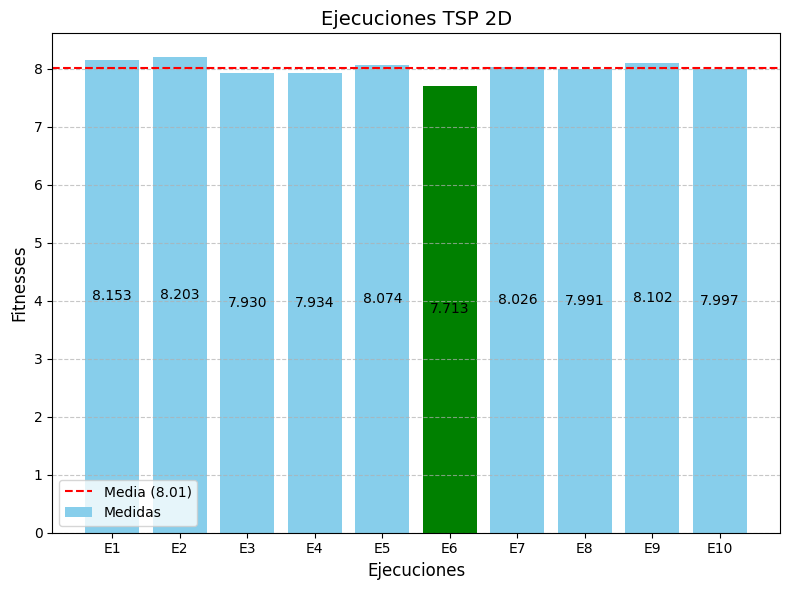

In [16]:
medidas_TSP = []
individuos_TSP = []

for i in range(1, 11):
    start = time.time()
    genetic_algorithm = AG_TSP_2D(alphabet=cities, population_size=100) 
    final_population = genetic_algorithm.evolve(fitness_function=globaldist, pmut=0.1, ngen=10000, T=6)
    minutos, segundos = divmod(time.time()-start, 60)
    print(f"Best fitness exec {i}: {genetic_algorithm.fitnesses[0]}")
    print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")
    medidas_TSP.append(genetic_algorithm.fitnesses[0])
    individuos_TSP.append(genetic_algorithm.population[0])

print("Best solution:")
best_index = medidas_TSP.index(min(medidas_TSP))
print(individuos_TSP[best_index])
plot_mean_fitnesses(medidas_TSP)

## **Comprobar fitness**

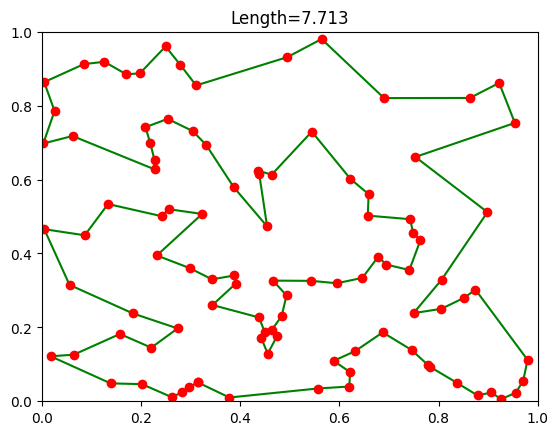

In [17]:
draw(individuos_TSP[best_index])

## **Guardar configuración**

In [29]:
# Guardar en un archivo .txt
with open("best_config.txt", "w") as archivo:
    for sublista in individuos_TSP[best_index]:
        archivo.write(", ".join(map(str, sublista)) + "\n")

print("Lista de listas guardada en 'best_config.txt'.")

with open("best_config.txt", "r") as archivo:
    lista_leida = [list(map(float, linea.strip().split(", "))) for linea in archivo]

print(lista_leida)

Lista de listas guardada en 'best_config.txt'.
[[0.31414095045738066, 0.051421702103483846], [0.2973635133076785, 0.037580527218207815], [0.2837581848186974, 0.02576704782244421], [0.2630560480211699, 0.010670642241309536], [0.20196772698059162, 0.046358747430397584], [0.13881496219356027, 0.048489530185603646], [0.01801973379815025, 0.12175434785651695], [0.06451313705472006, 0.12606114349173192], [0.15763623266223903, 0.18210618406479095], [0.22090405091557253, 0.14500040130773872], [0.2739561013272712, 0.1970964027924862], [0.1837236688553453, 0.23773749495644914], [0.05603526365085032, 0.3149530712641142], [0.005128451667189338, 0.4655718085045638], [0.08674110453583683, 0.4491174987265194], [0.13373527735293878, 0.5336853876899833], [0.2415634321550142, 0.500852093941769], [0.25580657871099755, 0.519726015381631], [0.323433933838161, 0.5068337090138902], [0.23212286400737547, 0.3945559700824013], [0.2980093518214506, 0.36041197123227897], [0.3434173147566393, 0.32992255868483356],